In [1]:
!pip3 install numpy scipy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
# Import pandas 
import pandas as pd 
import numpy as np
import random as rd
import matplotlib.pyplot as plt
# reading csv 
dataset = pd.read_csv("/content/VEHICLE_UPDATES_BogusInfoAttack_2022_04_24-07_11_27_PM.csv")
dataset.head()

,Message Type,Time,Name,Speed,Heading,Latitude,Longitude,Altitude,DistanceDriven,LongitudinalAcceleration,Slope,Stopped,RouteId,Connection.Id,LaneIndex,BlinkerRight,BlinkerLeft,BrakeLight
0,VEHICLE_UPDATES,7000000000,veh_0,12.054174,153.334237,52.991902,-1.169533,0.0,12.054174,-0.174106,0.0,False,1.0,30806029_1520526951_341336502,0.0,False,False,False
1,VEHICLE_UPDATES,8000000000,veh_0,11.304112,153.334237,52.991810,-1.169461,0.0,23.358286,-0.750062,0.0,False,1.0,30806029_1520526951_341336502,0.0,False,False,False
2,VEHICLE_UPDATES,8000000000,veh_1,9.728953,153.334237,52.991921,-1.169548,0.0,9.728953,-0.158221,0.0,False,1.0,30806029_1520526951_341336502,0.0,False,False,False
3,VEHICLE_UPDATES,9000000000,veh_0,11.634151,153.701439,52.991715,-1.169388,0.0,34.992436,0.330039,0.0,False,1.0,30806029_1520526951_341336502,0.0,False,False,False
4,VEHICLE_UPDATES,9000000000,veh_1,8.642093,153.334237,52.991850,-1.169493,0.0,18.371046,-1.086860,0.0,False,4.0,30806029_1520526951_341336502,0.0,False,False,True


In [81]:
non_numeric_cols = ['Message Type','Name','Stopped','BlinkerRight','BlinkerLeft','BrakeLight']#過濾非數值行
numeric_cols = [col for col in dataset.columns if col not in non_numeric_cols]


In [77]:
dataset.describe()

,Time,Speed,Heading,Latitude,Longitude,Altitude,DistanceDriven,LongitudinalAcceleration,Slope,RouteId,LaneIndex
count,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.0,2132.000000,2132.000000,2132.0,2132.000000,2132.000000
mean,1.889221e+11,7.850532,141.582766,52.986296,-1.156013,0.0,1433.541753,0.012420,0.0,3.587711,0.181520
std,1.045694e+11,4.757098,55.146088,0.003148,0.009162,0.0,901.260851,1.214475,0.0,1.033143,0.385539
min,7.000000e+09,0.000000,5.808197,52.981402,-1.169947,0.0,5.486615,-4.500000,0.0,1.000000,0.000000
25%,9.900000e+10,4.539714,106.764009,52.983902,-1.164257,0.0,577.151688,-0.414767,0.0,4.000000,0.000000
50%,1.880000e+11,9.004213,122.129708,52.984792,-1.156837,0.0,1473.749917,0.000000,0.0,4.000000,0.000000
75%,2.762500e+11,11.652686,171.853414,52.989422,-1.145710,0.0,2341.441790,0.609622,0.0,4.000000,0.000000
max,3.820000e+11,16.264215,357.741107,52.991955,-1.143075,0.0,2826.427090,2.599564,0.0,4.000000,1.000000


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[numeric_cols])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.132000e+03,2.132000e+03,2.132000e+03,2.132000e+03,2.132000e+03,2132.0,2.132000e+03,2.132000e+03,2132.0,2.132000e+03,2.132000e+03,2.132000e+03
mean,1.066481e-16,7.998605e-17,-3.732682e-16,6.744424e-13,-7.891957e-15,0.0,-5.332403e-17,6.665504e-18,0.0,-1.133136e-16,2.666202e-17,-1.066481e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,0.0,1.000235e+00,1.000235e+00,0.0,1.000235e+00,1.000235e+00,1.000235e+00
min,-1.740135e+00,-1.650665e+00,-2.462666e+00,-1.554837e+00,-1.521270e+00,0.0,-1.584880e+00,-3.716405e+00,0.0,-2.505285e+00,-5.054092e-01,-4.709315e-01
25%,-8.601299e-01,-6.961378e-01,-6.315394e-01,-7.606075e-01,-9.000284e-01,0.0,-9.504362e-01,-3.518289e-01,0.0,3.991563e-01,-4.533940e-01,-4.709315e-01
50%,-8.820511e-03,2.425746e-01,-3.528378e-01,-4.778113e-01,-9.002584e-02,0.0,4.462370e-02,-1.022920e-02,0.0,3.991563e-01,-4.517872e-01,-4.709315e-01
75%,8.353150e-01,7.994467e-01,5.490462e-01,9.930793e-01,1.124844e+00,0.0,1.007603e+00,4.918524e-01,0.0,3.991563e-01,8.254200e-01,-4.709315e-01
max,1.846843e+00,1.769074e+00,3.920660e+00,1.798032e+00,1.412503e+00,0.0,1.545848e+00,2.130758e+00,0.0,3.991563e-01,1.691138e+01,2.123451e+00


In [87]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
kmeans.inertia_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8696.737097477733

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

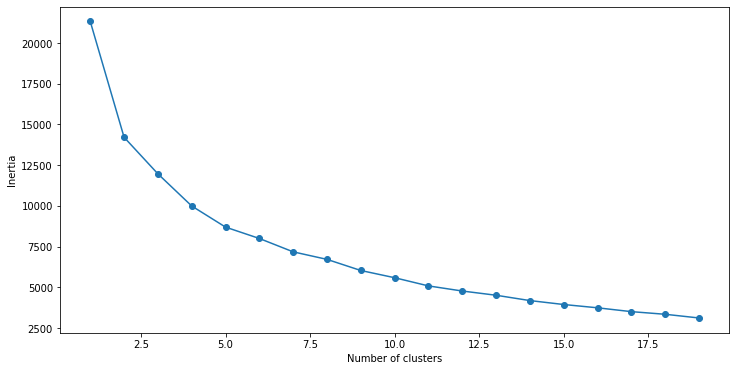

In [88]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))#在 Matplotlib 中創建了一個新的圖形對象，寬度為 12 英寸，高度為 6 英寸。然後可以使用該圖使用 Matplotlib 的繪圖函數創建一個或多個子圖或可視化。
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [91]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    803
0    628
2    265
1    235
4    201
Name: cluster, dtype: int64

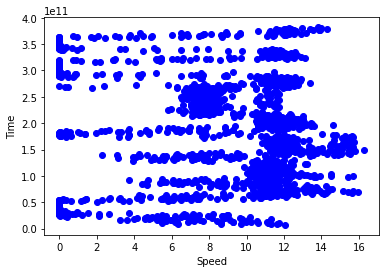

In [92]:
X = dataset[["Time","Speed"]]
#Visualise data points
plt.scatter(X["Speed"],X["Time"],c='blue')
plt.xlabel('Speed')
plt.ylabel('Time')
plt.show()


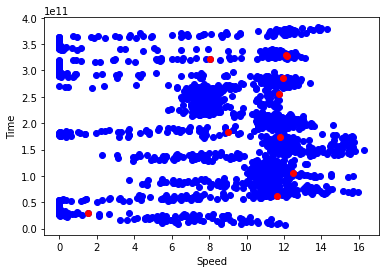

In [38]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=10

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Speed"],X["Time"],c='blue')
plt.scatter(Centroids["Speed"],Centroids["Time"],c='red')
plt.xlabel('Speed')
plt.ylabel('Time')
plt.show()

In [39]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Speed"]-row_d["Speed"])**2
            d2=(row_c["Time"]-row_d["Time"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Time","Speed"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Time'] - Centroids['Time']).sum() + (Centroids_new['Speed'] - Centroids['Speed']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Time","Speed"]]

<ipython-input-39-06b8da766862>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-39-06b8da766862>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


3227919903.9506288
-2696806.5020294404
-1137410972.4913414
-3116763595.719921
-2049897462.989738
-4094605243.516479
-4032705099.686308
-5026286965.906872
-3035023815.9265575
-4016198413.6379266
-4033770616.7598834
-2981121171.418695
-3025862068.6834793
-5001381215.397678
-5025676163.925008
-2974525474.6466556
-2018704699.2948847
-3971747471.3415008
-3020324491.884249
-2968857833.0729656
-1014016018.1467632
-999999999.9954668
-2013157894.5954115
-2964659685.848425
-4015045147.1273794
-2961611675.1011305
-2009469696.862542
-999999999.9796164
0.0


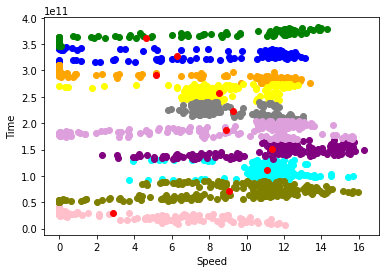

In [50]:
color=['blue','green','cyan','orange','yellow','purple','pink','gray','olive','plum']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Speed"],data["Time"],c=color[k])
plt.scatter(Centroids["Speed"],Centroids["Time"],c='red')
plt.xlabel('Speed')
plt.ylabel('Time')
plt.show()

### K-Means 聚類終極指南：定義、方法和應用

In [2]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


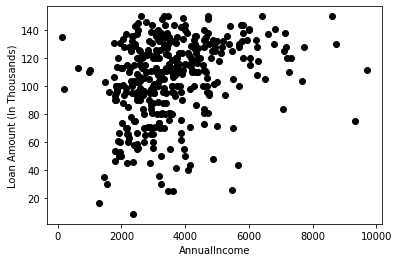

In [52]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

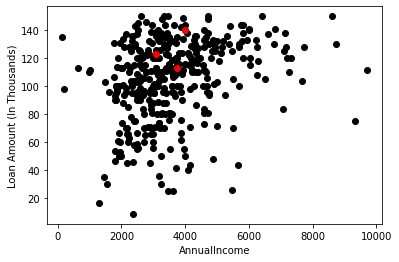

In [53]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [54]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-54-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-54-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


358.700199457833
200.55742674542654
258.95986160192535
225.82827972554003
205.1181293797553
87.59714920167968
80.42253001270922
99.50821192263949
27.38200063816943
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


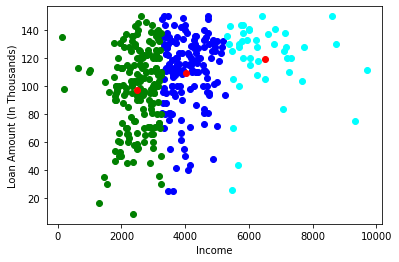

In [55]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [56]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [57]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [61]:
data.describe()
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [63]:

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
# inertia on the fitted data
kmeans.inertia_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2599.3855593561393

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

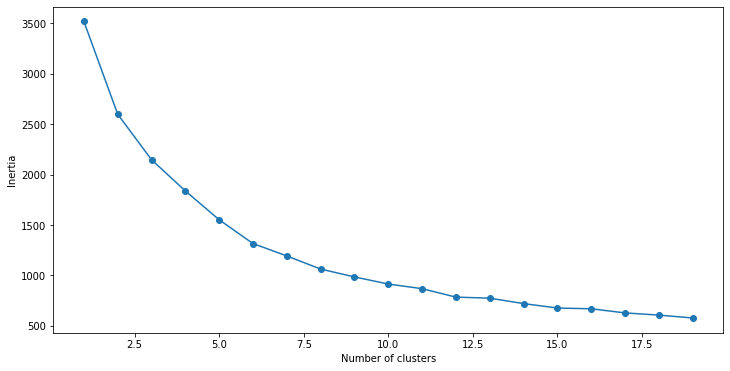

In [68]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [74]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    212
0    125
3     91
1     11
4      1
Name: cluster, dtype: int64